# Bessel functions

Plot some Bessel $J_m(x)$ functions.

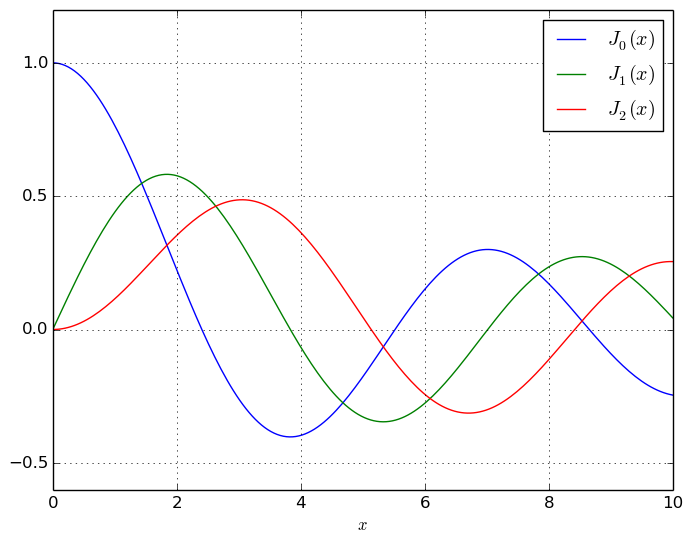

PyObject <matplotlib.legend.Legend object at 0x7ff0c6604c50>

In [1]:
using PyPlot
x = linspace(0, 10, 200)
plot(x, besselj(0,x))
plot(x, besselj(1,x))
plot(x, besselj(2,x))
grid()
xlabel(L"$x$")
legend([L"$J_0(x)$", L"$J_1(x)$", L"$J_2(x)$"])

## Dirichlet boundary conditions

For Dirichlet boundary conditions, as in class, we will have to scale these Bessel functions so that they are zero at the outer radius of our cylinder.  Now, let's numerically compute some roots of these Bessel functions by Newton's method:

In [2]:
using PyCall
@pyimport scipy.optimize as s

In [3]:
k01 = s.newton(x -> besselj(0,x), 2)
k02 = s.newton(x -> besselj(0,x), 5.5)
k01,k02

(2.4048255576957724,5.520078110286311)

Given the $n$-th root $k_{m,n}$ of $J_m(x)$, the corresponding radial form of the eigenfunction in a radius-1 cylinder with Dirichlet boundary conditions, from class, is $J_m(k_{m,n}r)$.  Let's plot a couple of them.:

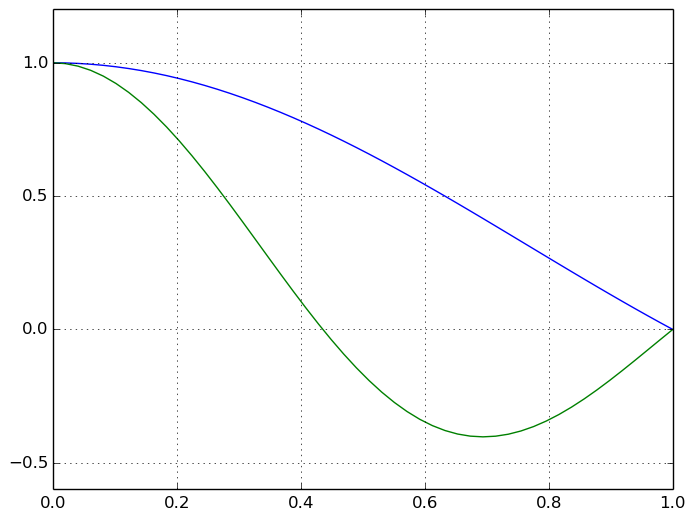

In [4]:
r = linspace(0,1)
plot(r, besselj(0,k01*r))
plot(r, besselj(0,k02*r))
grid()

From class, the Hermitian nature of $\nabla^2$ means that we should have an orthogonality relationship $\int_0^1 r\,dr\,J_m(k_{m,n}r)\,J_m(k_{m,n'}r)$ for $n \neq n'$.  Let's check that by numerical integration via `quadgk`:

In [5]:
quadgk(r -> r * besselj(0,k01*r) * besselj(0,k02*r), 0,1, abstol=1e-10)

(-1.3877787807814457e-17,8.29107615896163e-13)

(The first output is the estimated integral, and the second output is an estimated (conservative) upper bound for the error.  So, we see that the integral is indeed zero to within our requested tolerance of $10^{-10}$.)

The full eigenfunction is $J_m(k_{m,n}r) \cos(m\theta)$ or $\sin(m\theta)$.  Let's do a 2d plot of this for $m=0$, $n=2$, for fun:

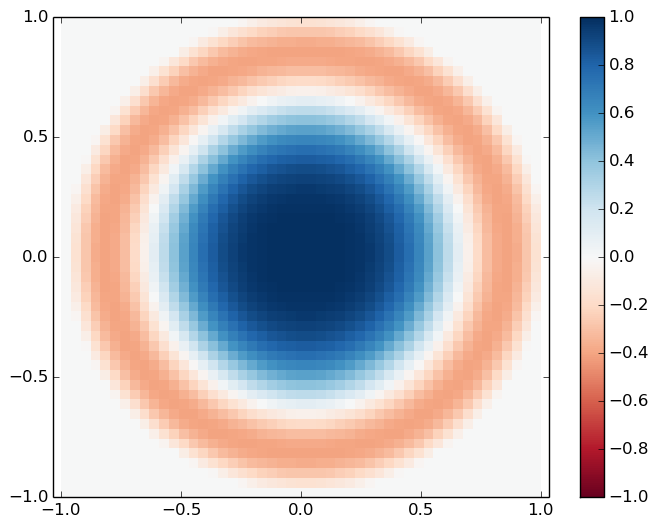

(-1.0,1.0,-1.0,1.0)

In [6]:
y = linspace(-1,1,50)
x = y'
r = x.^2 .+ y.^2
theta = broadcast(atan2, y, x)
pcolor(x,y, besselj(0,k02*r) .* (r .< 1), cmap="RdBu", vmin=-1, vmax=+1)
colorbar()
axis("equal")

## Neumann boundary conditions

For Neumann boundary conditions, we will instead need to set the derivative of the Bessel function to zero.  First, let's define a function to compute the derivative of the Bessel function, using the identity $J_m'(x) = \frac{dJ_m}{dx} = \frac{J_{m-1}(x) - J_{m+1}(x)}{2}$.

In [7]:
besseljp(m,x) = 0.5 * (besselj(m-1,x) - besselj(m+1,x))

besseljp (generic function with 1 method)

Quick check of $J_{3.2}'(4.5)$ against finite-difference approximation:

In [8]:
(besselj(3.2, 4.5 + 1e-8) - besselj(3.2, 4.5 - 1e-8)) / 2e-8 / besseljp(3.2, 4.5) - 1

1.4624961908182854e-7

Let's also plot $J_m'(x)$ for $m=1,2,3$:

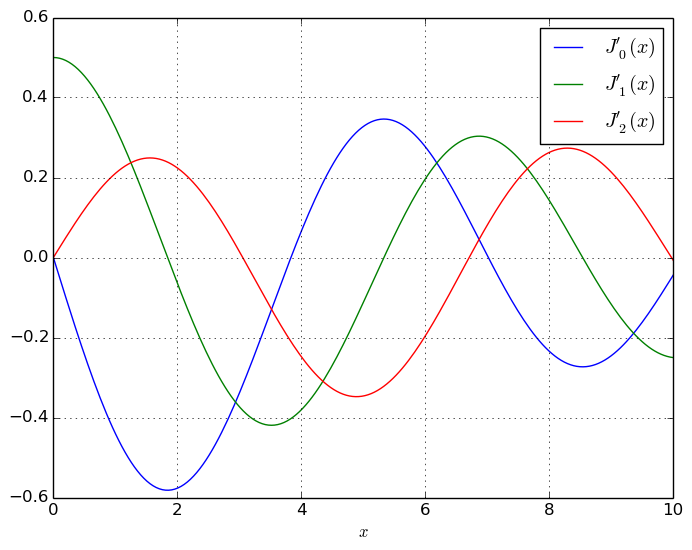

PyObject <matplotlib.legend.Legend object at 0x7ff0c1834bd0>

In [9]:
x = linspace(0, 10, 200)
plot(x, besseljp(0,x))
plot(x, besseljp(1,x))
plot(x, besseljp(2,x))
grid()
xlabel(L"$x$")
legend([L"$J'_0(x)$", L"$J'_1(x)$", L"$J'_2(x)$"])

Computation of $n$th zero of $J'_m$, with Newton's method on an approximate starting point from the asymptotic form.

(Better formulae for the starting guess could be devised; see e.g. the paper "Fast and accurate Bessel function computation" by J. Harrison.  However, for your problem sets, I wouldn't try to be fancy – just pick your starting guesses manually from the plot as in the previous section.)

In [10]:
besseljp_zero(m::Real, n::Integer) = n < 1 ? error("n >= 1 required") : 
                                     s.newton(x -> besseljp(m,x), (n-(m>0))*pi + pi/4 + m*pi/2)

besseljp_zero (generic function with 1 method)

In [11]:
guess(m,n)=(n-(m>0))*pi + pi/4 + m*pi/2
guess(1,1), besseljp_zero(1,1)

(2.356194490192345,1.8411837813406595)

Let's compute a little table of these zeros, along with our initial guesses, for a few $m$ and $n$:

In [12]:
[ besseljp_zero(m,n) for m in [0,1,2], n in [1,2,3,4] ], [ (n-(m>0))*pi + pi/4 + m*pi/2 for m in [0,1,2], n in [1,2,3,4] ]

(
3x4 Array{Any,2}:
 3.83171  7.01559  10.1735   13.3237
 1.84118  5.33144   8.53632  11.706 
 3.05424  6.70613   9.96947  13.1704,

3x4 Array{Float64,2}:
 3.92699  7.06858  10.2102   13.3518
 2.35619  5.49779   8.63938  11.781 
 3.92699  7.06858  10.2102   13.3518)

Now, let's plot $J_m(x)$ again, but this time put a dot at the location of the maxima and minima as determined from our zeros of $J_m'(x)$:

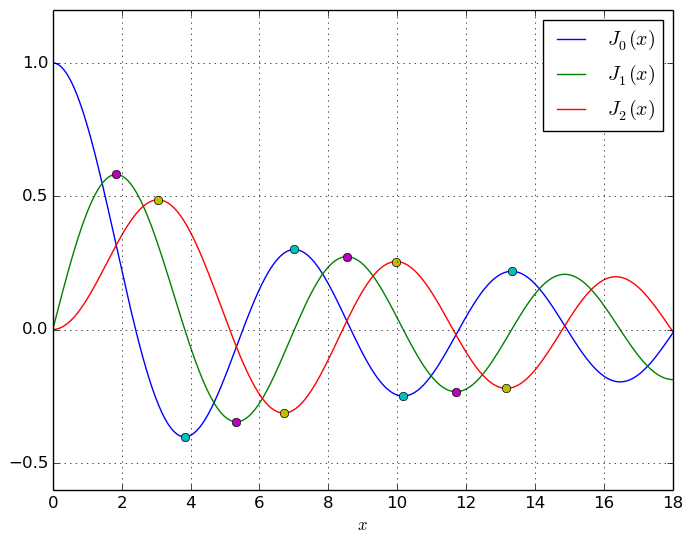

PyObject <matplotlib.legend.Legend object at 0x7ff0c178ded0>

In [13]:
x = linspace(0, 18, 200)
plot(x, besselj(0,x))
plot(x, besselj(1,x))
plot(x, besselj(2,x))
Z = [ besseljp_zero(m,n) for n in [1,2,3,4], m in [0,1,2] ]
plot(Z, [ besselj(m,Z[n,m+1]) for n in [1,2,3,4], m in [0,1,2] ], "o")
grid()
xlabel(L"$x$")
legend([L"$J_0(x)$", L"$J_1(x)$", L"$J_2(x)$"])

Hooray, looks like it's working!